In [4]:
import pandas as pd
import requests
import os
from PIL import Image
from pdf2image import convert_from_path
import pytesseract

In [5]:
forms_df = pd.read_excel("483s.xlsx")

OptionError: "No such keys(s): 'io.excel.zip.reader'"

In [17]:
def save_pdf_from_url(url, filepath):
    try:
        response = requests.get(url, stream = True, headers = {'User-Agent':'Mozilla/5.0'})
        response.raise_for_status()

        with open(filepath,'wb') as pdf_file:
            for chunk in response.iter_content(chunk_size=8192):
                pdf_file.write(chunk)
        print(f"pdf saved successfully to {filepath}")
    except requests.exceptions.RequestException as e:
        print(f"An error occured: {e}")
    except IOError as e:
        print(f"AN Io error as occurred: {e}")

In [19]:
for i in range(len(forms_df)):
    pdf_url = forms_df['Download'].iloc[i]
    recordid = forms_df['Record ID'].iloc[i]
    save_path = 'PDFs/'+str(recordid)+'.pdf'
    save_pdf_from_url(pdf_url,save_path)

pdf saved successfully to {filepath}
pdf saved successfully to {filepath}
pdf saved successfully to {filepath}
pdf saved successfully to {filepath}
pdf saved successfully to {filepath}
pdf saved successfully to {filepath}
pdf saved successfully to {filepath}
pdf saved successfully to {filepath}
pdf saved successfully to {filepath}
pdf saved successfully to {filepath}
pdf saved successfully to {filepath}
pdf saved successfully to {filepath}
pdf saved successfully to {filepath}
pdf saved successfully to {filepath}
pdf saved successfully to {filepath}
pdf saved successfully to {filepath}
pdf saved successfully to {filepath}
pdf saved successfully to {filepath}
pdf saved successfully to {filepath}
pdf saved successfully to {filepath}
pdf saved successfully to {filepath}
pdf saved successfully to {filepath}
pdf saved successfully to {filepath}
pdf saved successfully to {filepath}
pdf saved successfully to {filepath}
pdf saved successfully to {filepath}
pdf saved successfully to {filepath}
p

In [6]:
pdf_list = os.listdir('PDFs')
len(pdf_list)

1812

In [79]:
def pdf_to_text(filePath):

    doc = convert_from_path(filePath)
    path, fileName = os.path.split(filePath)
    fileBaseName, fileExtension = os.path.splitext(fileName)

    total_txt = ''
    total_page_data = []
    for page_number, page_data in enumerate(doc):
        txt = pytesseract.image_to_string(page_data).encode("utf-8")
        txt = str(txt)
        #if page_number == 0:
        #    txt = txt.split('(WE) OBSERVED')[1]
        #else:
        #    txt = txt.split("TYPE OF ESTABLISHMENT INSPECTED")[1]
        #txt = txt.split("EMPLOYEE(S) SIGNATURE")[0]
        txt = txt.replace('\\n','')
        total_txt+=str(txt)+'\n'
        total_page_data.append(page_data)
    
    # collect observations
    obs = total_txt.split('Observation')
    obs_list = []
    for ob in obs:
        observation = ob.split('Specifically,')[0]
        obs_list.append(observation)
    
    
    return total_txt, total_page_data, obs_list

In [89]:
for pdf in pdf_list:
    txt, page_data, obs_list = pdf_to_text('PDFs/'+pdf)
    with open(pdf[:-4]+'.txt','w') as file:
        file.write(txt)

In [7]:
txt_files = os.listdir('Txts')

In [8]:
txt_files[0]

'281938.txt'

In [18]:
def pdf_to_text_crop(filePath):

    doc = convert_from_path(filePath)
    path, fileName = os.path.split(filePath)
    fileBaseName, fileExtension = os.path.splitext(fileName)

    total_txt = ''
    total_page_data = []
    for page_number, page_data in enumerate(doc):
        if page_number == 0:
            data = pytesseract.image_to_data(page_data,output_type='dict')
            data_df = pd.DataFrame(data = zip(data['text'],data['left'],data['top'],data['width'],data['height']), columns = ['text','left','top','width','height'])
            try:
                crop_top = data_df[data_df.text == 'document']['top'].values[0]
            except:
                crop_top = data_df[data_df.text == 'DOCUMENT']['top'].values[0]
            
            crop_bot = data_df[data_df.text == 'EMPLOYEE(S)']['top'].values[0]+2
        page_data = page_data.crop((0,crop_top,2000,crop_bot))
            
        txt = pytesseract.image_to_string(page_data).encode("utf-8")
        txt = str(txt)
        
        txt = txt.replace('\\n','')
        total_txt+=str(txt)+'\n'
        total_page_data.append(page_data)
    
    # collect observations
    obs = total_txt.split('Observation')
    obs_list = []
    for ob in obs:
        observation = ob.split('Specifically')[0]
        if observation.upper().count("THIS DOCUMENT LISTS") == 0:
            obs_list.append(observation)
    
    
    return total_txt, total_page_data, obs_list

In [19]:
for pdf in pdf_list[:1]:
    print(pdf)
    try:
        txt, page_data, obs_list = pdf_to_text_crop('PDFs/'+pdf)
        with open('Txts/'+pdf[:-4]+'_crop.txt','w') as file:
            file.write(txt)

    except:
        print('Could not crop file')

281757.pdf


In [20]:
obs_list

[' 1:Failure to thoroughly investigate any unexplained discrepancy or failure of a batch or any of its components tomeet any of its specifications, whether the batch has already been distributed. ',
 ' 2:Failure to establish written procedures for production and process control designed to assure that the drug productsyou manufacture have the identity, strength, quality, and purity they purport or are represented to possess.',
 ' 3:Validations, designed to prevent microbial contamination of the drug product purporting to be sterile, have notbeen adequately established. ',
 " 4:A written procedure designed to prevent contamination of products during aseptic processing is not adequate.'\nb'",
 ' 5:Equipment and facilities used in the manufacture of drug product are not adequately maintained or appropriatelydesigned to facilitate operations for their intended use. ',
 ' 6:Your laboratory analytical method for endotoxin has not been adequately validated. ',
 ' 7:Standard operating procedur

In [274]:
filePath = 'PDFs/'+txt_file[:-4]+'.pdf'
doc = convert_from_path(filePath)
path, fileName = os.path.split(filePath)
fileBaseName, fileExtension = os.path.splitext(fileName)

total_txt = ''
total_page_data = []
for page_number, page_data in enumerate(doc):
    txt = pytesseract.image_to_string(page_data).encode("utf-8")
    txt = str(txt)
    if page_number == 0:
        data = pytesseract.image_to_data(page_data,output_type='dict')

        
    #if page_number == 0:
    #    txt = txt.split('(WE) OBSERVED')[1]
    #else:
    #    txt = txt.split("TYPE OF ESTABLISHMENT INSPECTED")[1]
    #txt = txt.split("EMPLOYEE(S) SIGNATURE")[0]
    txt = txt.replace('\\n','')
    total_txt+=str(txt)+'\n'
    total_page_data.append(page_data)

In [295]:
for key, value in data.items():
    print(key,value)

level [1, 2, 3, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 2, 3, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 2, 3, 4, 5, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 2, 3, 4, 5, 5, 4, 5, 5, 5, 5, 

In [299]:
data_df = pd.DataFrame(data = zip(data['text'],data['left'],data['top'],data['width'],data['height']), columns = ['text','left','top','width','height'])

In [303]:
data_df[data_df['text'].isin(['This','document','EMPLOYEE(S)'])]

,text,left,top,width,height
159,This,171,527,45,19
160,document,223,526,100,20
680,EMPLOYEE(S),394,1842,94,14


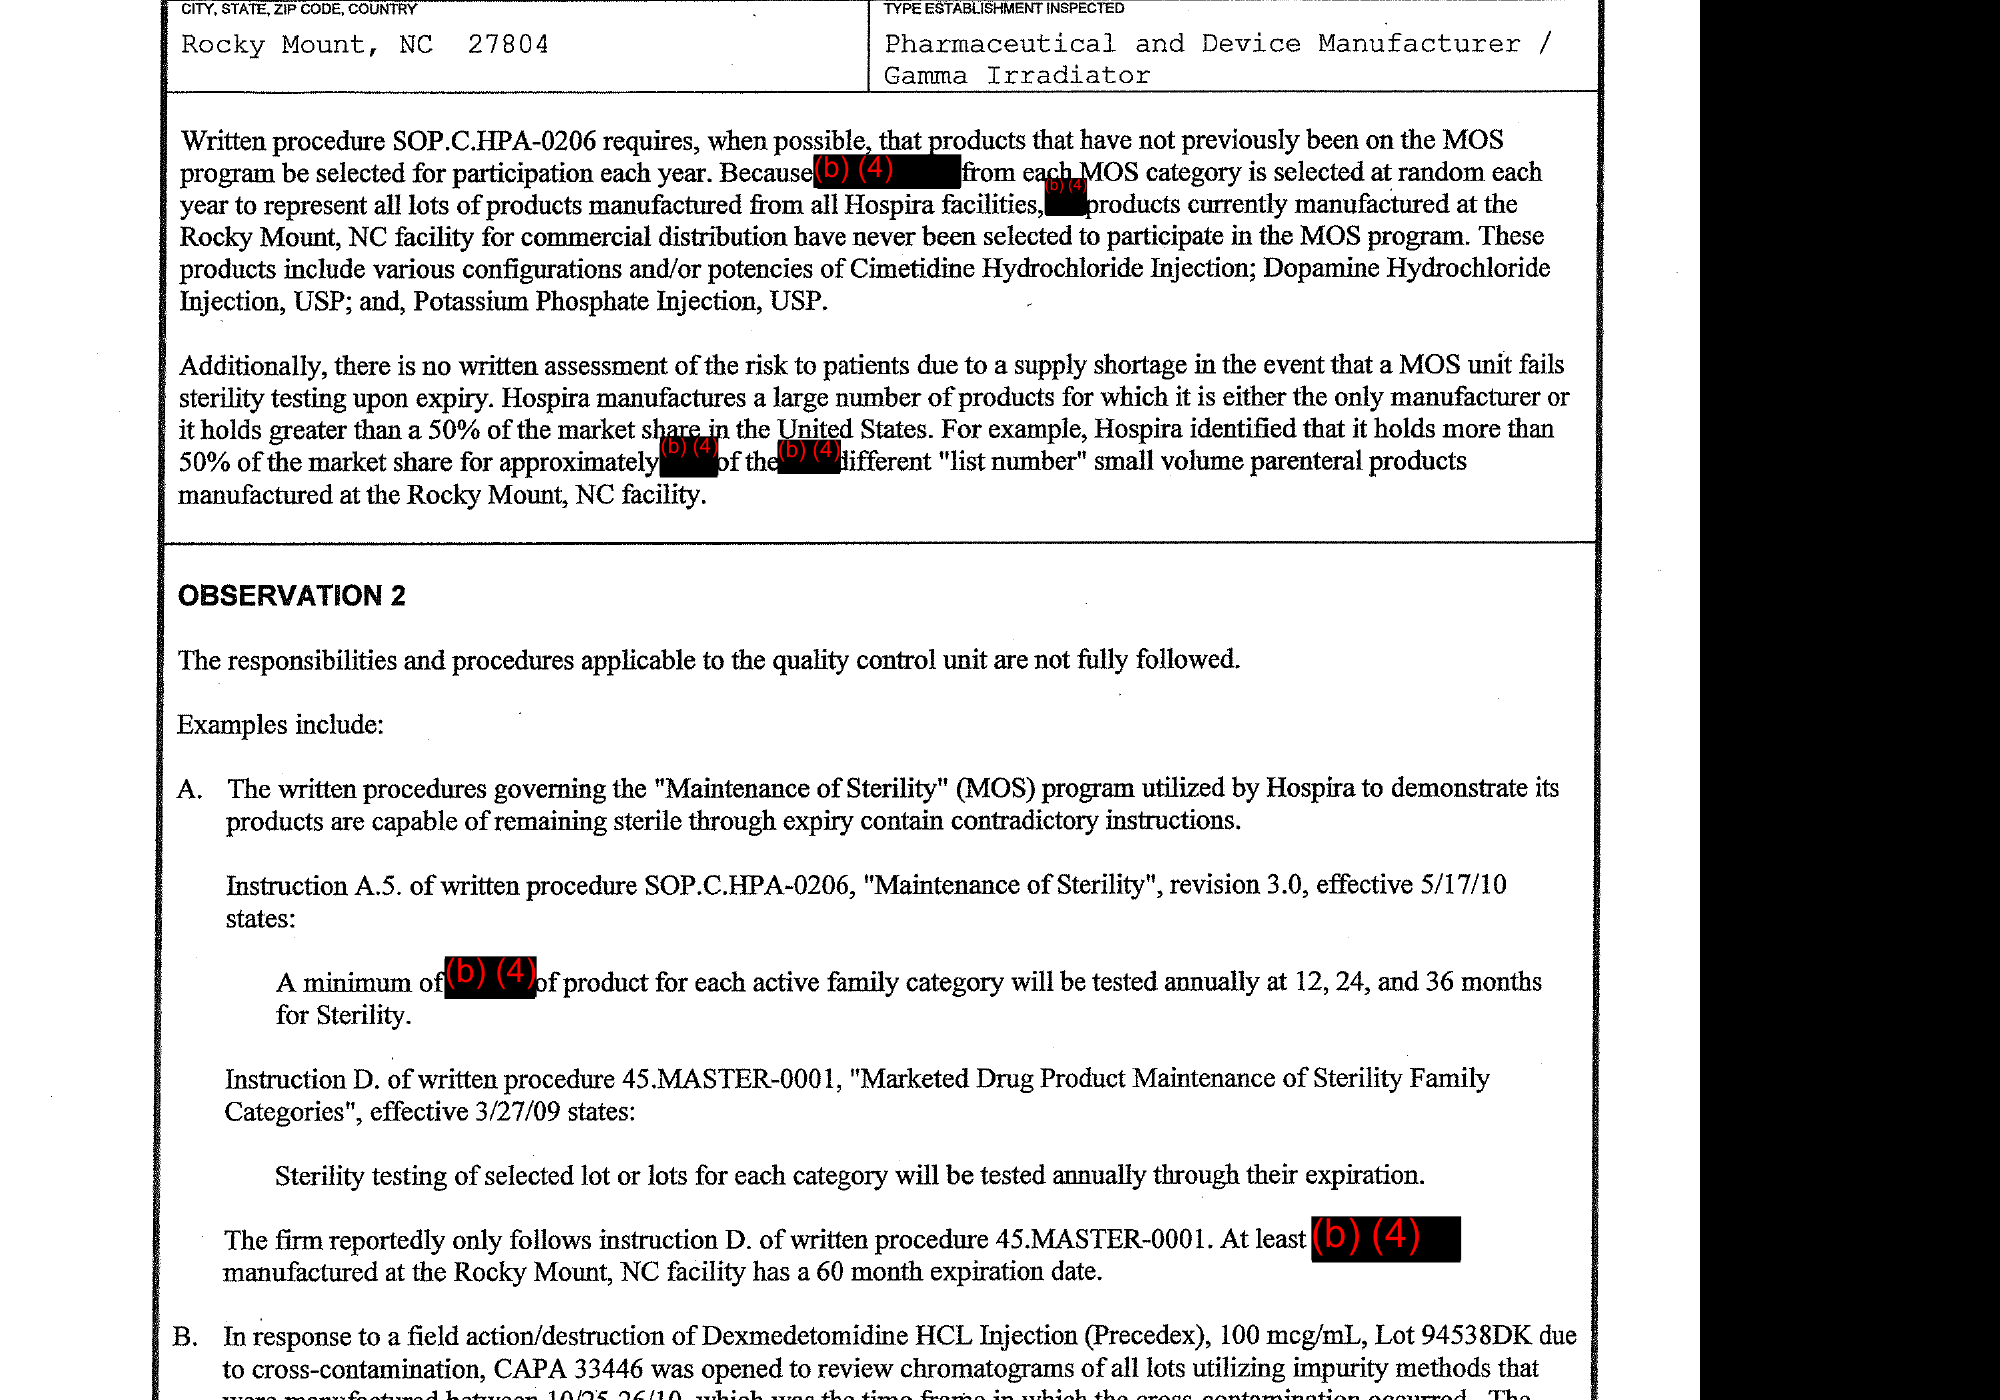

In [313]:
total_page_data[1].crop((0,400,2000,1800))

In [196]:
def find_all_indices(txt,substr):
    indices = []

    txt_sub = txt
    start_ind = 0
    while txt_sub.find(substr)!=-1:
        ind_ = txt_sub.find(substr)
        indices.append(ind_+start_ind)
        start_ind+=ind_
        txt_sub= txt_sub[ind_+1:]
    return indices



In [210]:
total_txt = total_txt.replace("'","")
trim_string = re.search('TYPE ESTABLISHMENT INSPECTED'+r"(.*?)"+'This document',total_txt).group(1)
# trim header off first page 
ind_start = total_txt.find('This document')
#total_txt = total_txt[ind_start:]

start_inds = find_all_indices(total_txt,trim_string)
end_inds = find_all_indices(total_txt,'EMPLOYEE(S)')

new_total_txt = ''
for j in range(len(end_inds)):
    new_total_txt += total_txt[start_inds[j]:end_inds[j]]
new_total_txt = new_total_txt.replace(trim_string,"")

IndexError: list index out of range

In [212]:
end_inds

[2190, 4320, 6612, 8887, 11294, 12893]

In [214]:
start_inds

[415, 2867, 11965]

In [217]:
trim_string

'Cheonan, Chungcheongnam, 31094 Korea Pharmaceutical Manufacturer(the Republic of)'

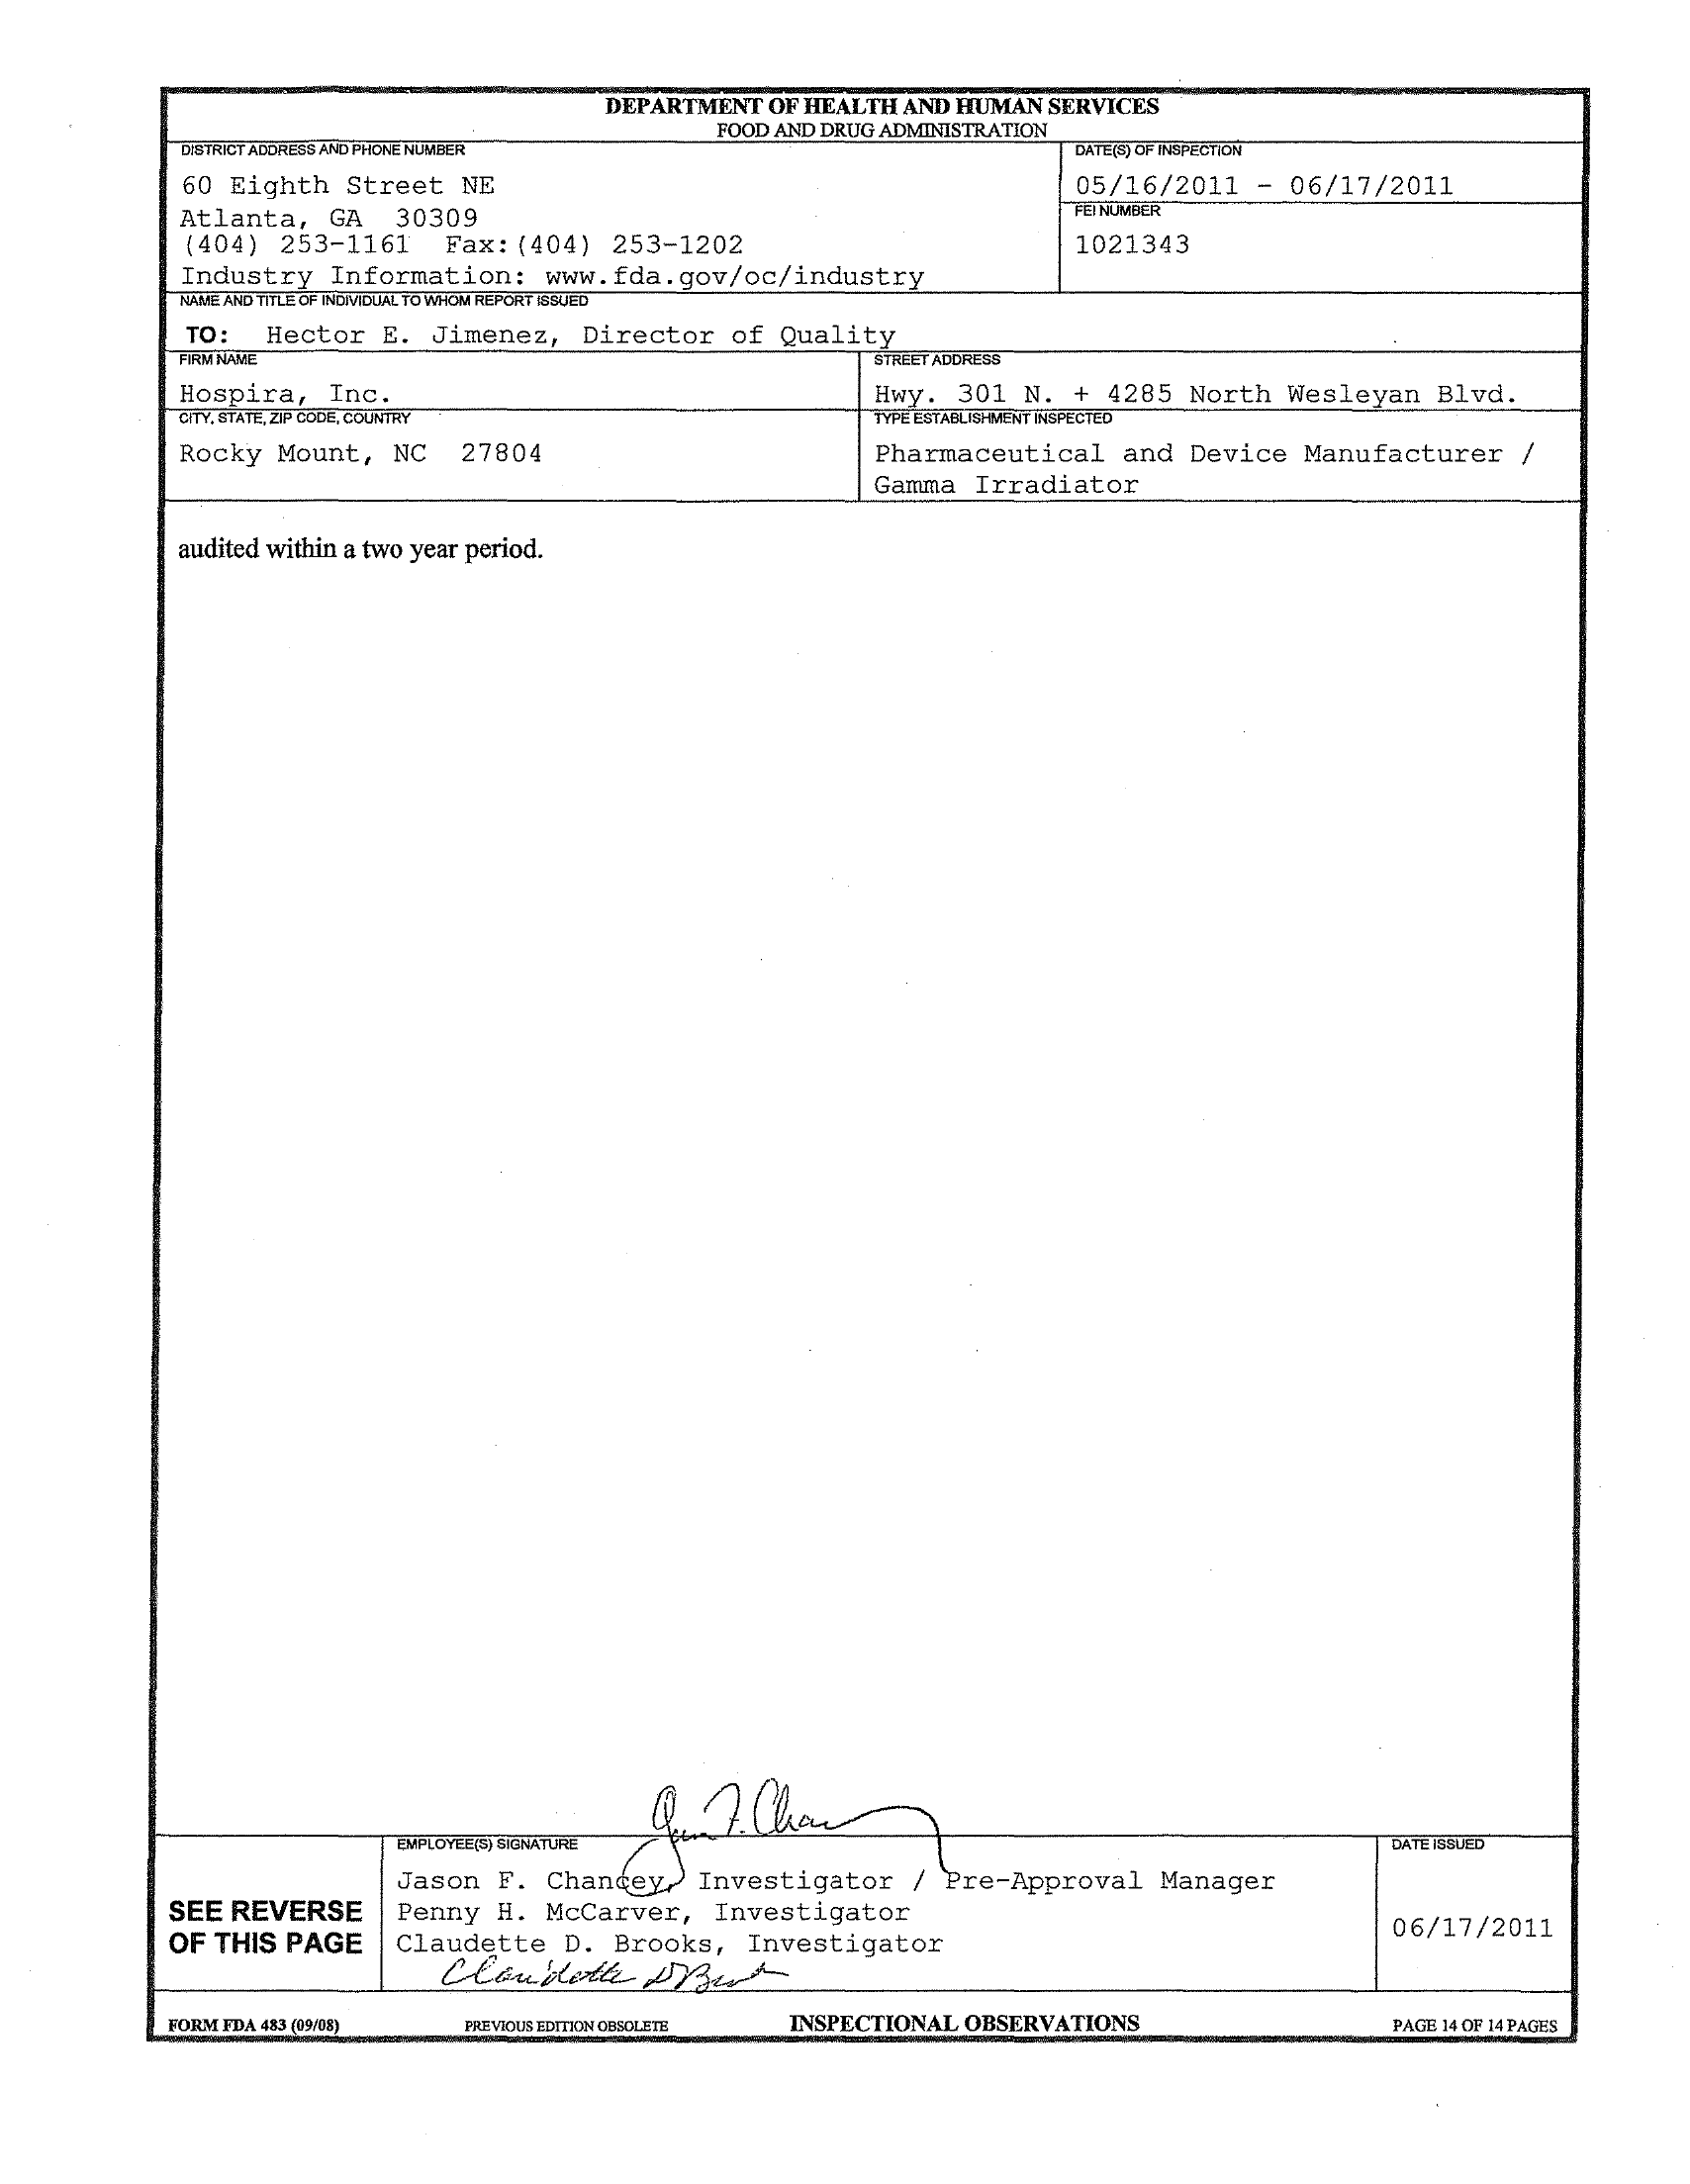

In [284]:
page_data

In [213]:
len(page_data)

6

# API

In [25]:
def pdf_to_text_crop(filePath):

    doc = convert_from_path(filePath)
    path, fileName = os.path.split(filePath)
    fileBaseName, fileExtension = os.path.splitext(fileName)

    total_txt = ''
    total_page_data = []
    for page_number, page_data in enumerate(doc):
        if page_number == 0:
            data = pytesseract.image_to_data(page_data,output_type='dict')
            data_df = pd.DataFrame(data = zip(data['text'],data['left'],data['top'],data['width'],data['height']), columns = ['text','left','top','width','height'])
            try:
                crop_top = data_df[data_df.text == 'document']['top'].values[0]
            except:
                crop_top = data_df[data_df.text == 'DOCUMENT']['top'].values[0]
            
            crop_bot = data_df[data_df.text == 'EMPLOYEE(S)']['top'].values[0]+2
        page_data = page_data.crop((0,crop_top,2000,crop_bot))
            
        txt = pytesseract.image_to_string(page_data).encode("utf-8")
        txt = str(txt)
        
        txt = txt.replace('\\n','')
        total_txt+=str(txt)+'\n'
        total_page_data.append(page_data)
    
    # collect observations
    obs = total_txt.split('Observation')
    obs_list = []
    for ob in obs:
        observation = ob.split('Specifically')[0]
        if observation.upper().count("THIS DOCUMENT LISTS") == 0:

            observation = observation.split(":")[1]
            obs_list.append(observation)
    
    
    return total_txt, total_page_data, obs_list

In [26]:
# inputs
pdf = pdf_list[0]

In [27]:
# pdf to observations
try:
    txt, page_data, obs_list = pdf_to_text_crop('PDFs/'+pdf)
    with open('Txts/'+pdf[:-4]+'_crop.txt','w') as file:
        file.write(txt)

except:
    print('Could not crop file',pdf)

print(obs_list)

['Failure to thoroughly investigate any unexplained discrepancy or failure of a batch or any of its components tomeet any of its specifications, whether the batch has already been distributed. ', 'Failure to establish written procedures for production and process control designed to assure that the drug productsyou manufacture have the identity, strength, quality, and purity they purport or are represented to possess.', 'Validations, designed to prevent microbial contamination of the drug product purporting to be sterile, have notbeen adequately established. ', "A written procedure designed to prevent contamination of products during aseptic processing is not adequate.'\nb'", 'Equipment and facilities used in the manufacture of drug product are not adequately maintained or appropriatelydesigned to facilitate operations for their intended use. ', 'Your laboratory analytical method for endotoxin has not been adequately validated. ', 'Standard operating procedures are not followed or are 